In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
cf = pd.read_csv('codeforces_problems_cleaned.csv')
cf

,contestId,index,name,rating,tags,solvedCount
0,2162,H,Beautiful Problem,2900.0,['dp'],185
1,2162,G,Beautiful Tree,2200.0,"['constructive algorithms', 'math', 'probabili...",2055
2,2162,F,Beautiful Intervals,2100.0,"['constructive algorithms', 'greedy']",2130
3,2162,E,Beautiful Palindromes,1600.0,"['constructive algorithms', 'greedy', 'schedul...",6954
4,2162,D,Beautiful Permutation,1400.0,"['binary search', 'interactive']",9904
...,...,...,...,...,...,...
10321,2,B,The least round way,2000.0,"['dp', 'math']",12227
10322,2,A,Winner,1500.0,"['hashing', 'implementation']",29504
10323,1,C,Ancient Berland Circus,2100.0,"['geometry', 'math']",6130
10324,1,B,Spreadsheet,1600.0,"['implementation', 'math']",25137


In [3]:
cf['QID'] = cf['contestId'].astype(str) + '/' + cf['index']
cf['tags'].value_counts()

tags
['implementation']                                                                                                   443
['math']                                                                                                             221
['greedy']                                                                                                           178
['implementation', 'math']                                                                                           169
['dp']                                                                                                               152
                                                                                                                    ... 
['binary search', 'constructive algorithms', 'data structures', 'divide and conquer', 'greedy', 'shortest paths']      1
['brute force', 'constructive algorithms', 'dfs and similar', 'dp', 'greedy', 'trees']                                 1
['brute force', 'data struc

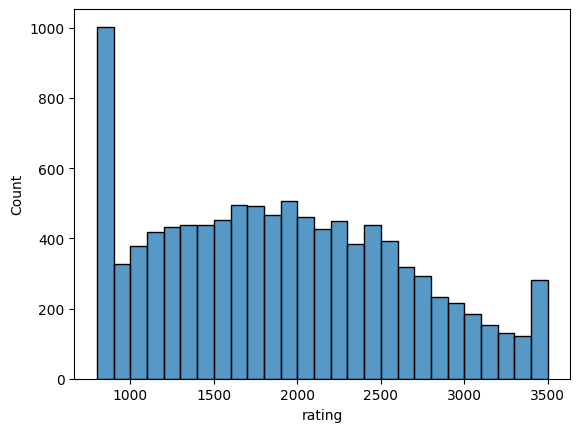

In [4]:
sns.histplot(cf['rating'])
plt.show()

difficulty
Medium    5445
Easy      2559
Hard      2322
Name: count, dtype: int64


[]

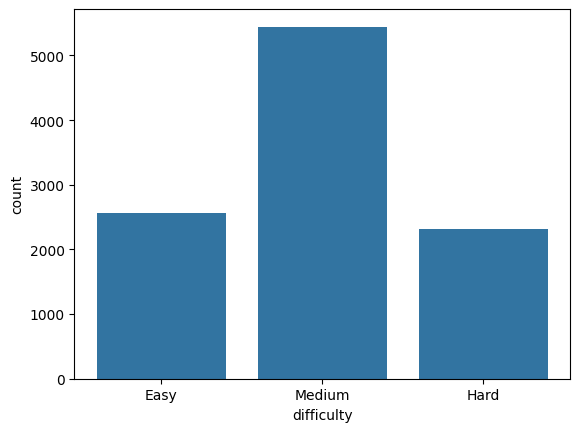

In [5]:
bins = [0, 1250, 2500, np.inf]
labels = ['Easy', 'Medium', 'Hard']

cf['difficulty'] = pd.cut(
    cf['rating'],
    bins=bins,
    labels=labels,
    right=False
)
print(cf['difficulty'].value_counts())
sns.countplot(x = cf['difficulty'])
plt.plot()

In [6]:
cf.drop(columns=['solvedCount','contestId', 'index','rating'], inplace=True)
cf.rename(columns={'name':'title'}, inplace=True)
cf

,title,tags,QID,difficulty
0,Beautiful Problem,['dp'],2162/H,Hard
1,Beautiful Tree,"['constructive algorithms', 'math', 'probabili...",2162/G,Medium
2,Beautiful Intervals,"['constructive algorithms', 'greedy']",2162/F,Medium
3,Beautiful Palindromes,"['constructive algorithms', 'greedy', 'schedul...",2162/E,Medium
4,Beautiful Permutation,"['binary search', 'interactive']",2162/D,Medium
...,...,...,...,...
10321,The least round way,"['dp', 'math']",2/B,Medium
10322,Winner,"['hashing', 'implementation']",2/A,Medium
10323,Ancient Berland Circus,"['geometry', 'math']",1/C,Medium
10324,Spreadsheet,"['implementation', 'math']",1/B,Medium


In [7]:
cf_tags = cf['tags'].value_counts()
cf_tags.to_csv('cf_tags.csv')

In [8]:
cf

,title,tags,QID,difficulty
0,Beautiful Problem,['dp'],2162/H,Hard
1,Beautiful Tree,"['constructive algorithms', 'math', 'probabili...",2162/G,Medium
2,Beautiful Intervals,"['constructive algorithms', 'greedy']",2162/F,Medium
3,Beautiful Palindromes,"['constructive algorithms', 'greedy', 'schedul...",2162/E,Medium
4,Beautiful Permutation,"['binary search', 'interactive']",2162/D,Medium
...,...,...,...,...
10321,The least round way,"['dp', 'math']",2/B,Medium
10322,Winner,"['hashing', 'implementation']",2/A,Medium
10323,Ancient Berland Circus,"['geometry', 'math']",1/C,Medium
10324,Spreadsheet,"['implementation', 'math']",1/B,Medium


# LeetCode Dataset PreProcessing

In [9]:
lc = pd.read_csv('leetcode_filtered_problems.csv')
lc

,QID,title,difficulty,categorySlug,topicTags
0,1,Two Sum,Easy,algorithms,"array,hash-table"
1,2,Add Two Numbers,Medium,algorithms,"linked-list,math,recursion"
2,3,Longest Substring Without Repeating Characters,Medium,algorithms,"hash-table,string,sliding-window"
3,4,Median of Two Sorted Arrays,Hard,algorithms,"array,binary-search,divide-and-conquer"
4,5,Longest Palindromic Substring,Medium,algorithms,"two-pointers,string,dynamic-programming"
...,...,...,...,...,...
3730,3731,Find Missing Elements,Easy,algorithms,"array,hash-table,sorting"
3731,3732,Maximum Product of Three Elements After One Re...,Medium,algorithms,"array,math,greedy,sorting"
3732,3733,Minimum Time to Complete All Deliveries,Medium,algorithms,"math,binary-search"
3733,3734,Lexicographically Smallest Palindromic Permuta...,Hard,algorithms,"two-pointers,string,enumeration"


In [10]:
lc = lc.drop(lc[lc['categorySlug'] != 'algorithms'].index, axis=0)
lc.drop(columns=['categorySlug'], inplace=True)
lc['Topics'] = lc['topicTags'].apply(lambda x: x.split(',') if isinstance(x, str) else np.nan)
lc.head()

,QID,title,difficulty,topicTags,Topics
0,1,Two Sum,Easy,"array,hash-table","[array, hash-table]"
1,2,Add Two Numbers,Medium,"linked-list,math,recursion","[linked-list, math, recursion]"
2,3,Longest Substring Without Repeating Characters,Medium,"hash-table,string,sliding-window","[hash-table, string, sliding-window]"
3,4,Median of Two Sorted Arrays,Hard,"array,binary-search,divide-and-conquer","[array, binary-search, divide-and-conquer]"
4,5,Longest Palindromic Substring,Medium,"two-pointers,string,dynamic-programming","[two-pointers, string, dynamic-programming]"


In [11]:
lc.drop(columns=['topicTags'], inplace=True)
lc.head()

,QID,title,difficulty,Topics
0,1,Two Sum,Easy,"[array, hash-table]"
1,2,Add Two Numbers,Medium,"[linked-list, math, recursion]"
2,3,Longest Substring Without Repeating Characters,Medium,"[hash-table, string, sliding-window]"
3,4,Median of Two Sorted Arrays,Hard,"[array, binary-search, divide-and-conquer]"
4,5,Longest Palindromic Substring,Medium,"[two-pointers, string, dynamic-programming]"


In [12]:
lc_tags = lc['Topics'].value_counts()
lc_tags.to_csv('lc_tags.csv')

## Finding Common Tags

In [13]:
lc_cleaned = lc.explode('Topics')
    
# Get all unique LeetCode tags
lc_unique_tags = set(lc_cleaned['Topics'].dropna().unique())
print(f"Found {len(lc_unique_tags)} unique LeetCode tags.")

Found 69 unique LeetCode tags.


In [14]:
def safe_eval(tag_string):
    try:
        return ast.literal_eval(tag_string)
    except (ValueError, SyntaxError):
        return [tag_string]

cf['Topics'] = cf['tags'].apply(safe_eval)
cf_cleaned = cf.explode('Topics')
    
# Get all unique Codeforces tags
cf_unique_tags = set(cf_cleaned['Topics'].dropna().unique())
print(f"Found {len(cf_unique_tags)} unique Codeforces tags.")


Found 37 unique Codeforces tags.


In [15]:
# Find tags that are exactly the same in both (e.g., 'math')
common_tags = lc_unique_tags.intersection(cf_unique_tags)
print(f"\nFound {len(common_tags)} common tags that don't need mapping.")

# Find tags that are only in Codeforces
cf_only_tags = cf_unique_tags.difference(lc_unique_tags)
print("\n--- TAGS ONLY IN CODEFORCES (Potential Mappings) ---")
print(sorted(list(cf_only_tags)))

# Find tags that are only in LeetCode
lc_only_tags = lc_unique_tags.difference(cf_unique_tags)
print("\n--- TAGS ONLY IN LEETCODE (The Standard) ---")
print(sorted(list(lc_only_tags)))


Found 5 common tags that don't need mapping.

--- TAGS ONLY IN CODEFORCES (Potential Mappings) ---
['*special', '2-sat', 'binary search', 'bitmasks', 'brute force', 'chinese remainder theorem', 'constructive algorithms', 'data structures', 'dfs and similar', 'divide and conquer', 'dp', 'dsu', 'expression parsing', 'fft', 'flows', 'games', 'graph matchings', 'graphs', 'hashing', 'implementation', 'matrices', 'meet-in-the-middle', 'number theory', 'probabilities', 'schedules', 'shortest paths', 'sortings', 'string suffix structures', 'strings', 'ternary search', 'trees', 'two pointers']

--- TAGS ONLY IN LEETCODE (The Standard) ---
['array', 'backtracking', 'biconnected-component', 'binary-indexed-tree', 'binary-search', 'binary-search-tree', 'binary-tree', 'bit-manipulation', 'bitmask', 'brainteaser', 'breadth-first-search', 'bucket-sort', 'counting', 'counting-sort', 'data-stream', 'depth-first-search', 'design', 'divide-and-conquer', 'doubly-linked-list', 'dynamic-programming', 'enum

In [16]:
import pandas as pd
import ast
import numpy as np

def normalize_tags(tag_string):
    """
    This is the robust cleaning function from our previous conversation.
    It handles all messy formats: 'tag1', 'tag1,tag2', "['tag1', 'tag2']", etc.
    """
    if not isinstance(tag_string, str):
        return []  # Handle NaNs
    
    tag_string = tag_string.strip()
    
    try:
        # Try to parse it as a Python literal (e.g., "['a', 'b']")
        parsed = ast.literal_eval(tag_string)
        if isinstance(parsed, list):
            # It was a list! e.g., "['a', 'b']" -> ['a', 'b']
            return [str(tag).strip().strip("'\"[] ") for tag in parsed if tag]
        else:
            # It was just a string literal, e.g., "'database'"
            tag_string = str(parsed)
            
    except (ValueError, SyntaxError):
        # It's not a valid Python literal, e.g., "database" or "array,math"
        pass
    
    # Fallback for plain strings: "a,b" or "database"
    tags = tag_string.split(',')
    cleaned_tags = []
    for tag in tags:
        clean_tag = tag.strip().strip("'\"[] ") # Aggressively clean
        if clean_tag:
            cleaned_tags.append(clean_tag)
    return cleaned_tags

# --- 1. Load LeetCode Data (lc_tags.csv) ---
print("Processing LeetCode file...")
lc_df = pd.read_csv("lc_tags.csv")
# Use the robust function on your 'Topics' column
lc_df['tags_list'] = lc_df['Topics'].apply(normalize_tags)
lc_cleaned = lc_df.explode('tags_list')

# Rename the cleaned tag column to 'standard_tag'
lc_cleaned = lc_cleaned.rename(columns={'tags_list': 'standard_tag'})
lc_final = lc_cleaned[['standard_tag', 'count']]


# --- 2. Load Codeforces Data (cf_tags.csv) ---
print("Processing Codeforces file...")
cf_df = pd.read_csv("cf_tags.csv")
# Use the robust function on your 'tags' column
cf_df['tags_list'] = cf_df['tags'].apply(normalize_tags)
cf_cleaned = cf_df.explode('tags_list')

# This is the 'raw' tag before mapping
cf_cleaned = cf_cleaned.rename(columns={'tags_list': 'tag'}) 

# --- 3. Define Mapping and Standardize Codeforces Tags ---
print("Applying tag normalization...")
tag_mapping = {
    # 'codeforces_tag': 'leetcode_tag',
    'binary search': 'binary-search',
    'bitmasks': 'bitmask',
    'brute force': 'enumeration',
    'dfs and similar': 'depth-first-search',
    'divide and conquer': 'divide-and-conquer',
    'dp': 'dynamic-programming',
    'dsu': 'union-find',
    'games': 'game-theory',
    'graphs': 'graph',
    'hashing': 'hash-table',
    'implementation': 'simulation',
    'matrices': 'matrix',
    'number theory': 'number-theory',
    'probabilities': 'probability-and-statistics',
    'shortest paths': 'shortest-path',
    'sortings': 'sorting',
    'string suffix structures': 'suffix-array',
    'strings': 'string',
    'trees': 'tree',
    'two pointers': 'two-pointers'
}

# Apply the mapping to get the 'standard_tag'
cf_cleaned['standard_tag'] = cf_cleaned['tag'].map(tag_mapping).fillna(cf_cleaned['tag'])

# Select the NEW 'standard_tag' column (this was the bug)
cf_final = cf_cleaned[['standard_tag', 'count']]


# --- 4. Combine and Save Final Result ---
print("Combining and saving final file...")

# Now this will work, as both DFs have 'standard_tag' and 'count'
all_tags_df = pd.concat([lc_final, cf_final])

# Group by the single, clean 'standard_tag' column
final_tag_counts = all_tags_df.groupby('standard_tag')['count'].sum().sort_values(ascending=False).reset_index()

# Save the final, model-ready file
output_file = "all_tags_standardized.csv"
final_tag_counts.to_csv(output_file, index=False)

print(f"\nProcess complete! Standardized tag counts saved to '{output_file}'")
print("\n--- Head of Final Standardized Data ---")
print(final_tag_counts.head(10))

Processing LeetCode file...
Processing Codeforces file...
Applying tag normalization...
Combining and saving final file...

Process complete! Standardized tag counts saved to 'all_tags_standardized.csv'

--- Head of Final Standardized Data ---
              standard_tag  count
0                     math   3842
1                   greedy   3708
2               simulation   3087
3      dynamic-programming   2954
4                    array   2036
5              enumeration   2004
6  constructive algorithms   1952
7          data structures   1906
8                  sorting   1651
9                   string   1587


In [17]:
cf['Platform'] = 'Codeforces'
lc['Platform'] = 'LeetCode'

In [18]:
print(cf.info())
print(lc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10326 entries, 0 to 10325
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   title       10326 non-null  object  
 1   tags        10326 non-null  object  
 2   QID         10326 non-null  object  
 3   difficulty  10326 non-null  category
 4   Topics      10326 non-null  object  
 5   Platform    10326 non-null  object  
dtypes: category(1), object(5)
memory usage: 413.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 3321 entries, 0 to 3734
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   QID         3321 non-null   int64 
 1   title       3321 non-null   object
 2   difficulty  3321 non-null   object
 3   Topics      3318 non-null   object
 4   Platform    3321 non-null   object
dtypes: int64(1), object(4)
memory usage: 155.7+ KB
None


In [19]:
cf.drop(columns = ['tags'])
merged_df = pd.concat([cf, lc], ignore_index=True)
merged_df

,title,tags,QID,difficulty,Topics,Platform
0,Beautiful Problem,['dp'],2162/H,Hard,[dp],Codeforces
1,Beautiful Tree,"['constructive algorithms', 'math', 'probabili...",2162/G,Medium,"[constructive algorithms, math, probabilities,...",Codeforces
2,Beautiful Intervals,"['constructive algorithms', 'greedy']",2162/F,Medium,"[constructive algorithms, greedy]",Codeforces
3,Beautiful Palindromes,"['constructive algorithms', 'greedy', 'schedul...",2162/E,Medium,"[constructive algorithms, greedy, schedules]",Codeforces
4,Beautiful Permutation,"['binary search', 'interactive']",2162/D,Medium,"[binary search, interactive]",Codeforces
...,...,...,...,...,...,...
13642,Find Missing Elements,NaN,3731,Easy,"[array, hash-table, sorting]",LeetCode
13643,Maximum Product of Three Elements After One Re...,NaN,3732,Medium,"[array, math, greedy, sorting]",LeetCode
13644,Minimum Time to Complete All Deliveries,NaN,3733,Medium,"[math, binary-search]",LeetCode
13645,Lexicographically Smallest Palindromic Permuta...,NaN,3734,Hard,"[two-pointers, string, enumeration]",LeetCode


In [20]:
merged_df.to_csv('merged_problems.csv', index=False)